# How are skills Trending?

#### How are Top 7 Skills Trending :
1. Data Analyst
2. Data Engineer
3. Data Scientist
4. Software Engineer

#### Methdology
1. Aggregate skill count monthly
2. Analysze based on percentage of total jobs
3. Visualize Trend

### Loading and Cleaning

In [302]:
# importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import seaborn as sns

# loading data set
df = pd.read_csv("C:\\Users\\Dell\\Documents\\VSCODE\\Python\\Data Analysis\\Data\\data_jobs.csv")

# data cleaning
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x : literal_eval(x) if pd.notna(x) else x)

In [303]:
# country and role of interest
country = "United States"
role = "Data Analyst"

### Monthly Count Aggregation

In [304]:
# filtering for topics of interest
df_filtered = df[(df["job_title_short"] == role) & (df["job_country"] == country)].copy()

In [305]:
# extracting relevant data
df_short = df_filtered[["job_posted_date", "job_skills"]].dropna(subset = "job_skills")
df_short["job_posted_month"] = df_short["job_posted_date"].dt.month
df_short = df_short.drop(columns = "job_posted_date")
df_short = df_short.reset_index(drop = "index")

In [306]:
# calaculating monthly counts for each skills
df_exploded = df_short.explode("job_skills")
df_monthly_counts = df_exploded.pivot_table(
                    index = "job_posted_month",
                    columns = "job_skills",
                    aggfunc = "size",
                    fill_value = 0
                )

#calculting total jobs in every month
total_monthly = df_short["job_posted_month"].value_counts().sort_index()

#sorting counts to only include top 7
df_monthly_counts.loc["Total"] = df_monthly_counts.sum(axis = 0)
df_monthly_counts = df_monthly_counts.sort_values(axis = 1, by = "Total", ascending = False)
df_monthly_counts = df_monthly_counts.drop(index = "Total").iloc[ : , : 7]

# changing index values from numeric to months name
df_monthly_counts.index = [pd.to_datetime(f"2025-{x + 1}-1").strftime("%b") for x in range(len(df_monthly_counts))] 
df_monthly_counts.index.name = "job_posted_month"


### Monthly Percentage Aggregation

In [307]:
# copying counts to ennsure that it is not altered
df_monthly_percent = df_monthly_counts.copy()

# calculate monthly percantage by dividing total number of job in that month
df_monthly_percent = (df_monthly_percent.div(total_monthly.values, axis = 0) * 100).round(1)

### Visualizing

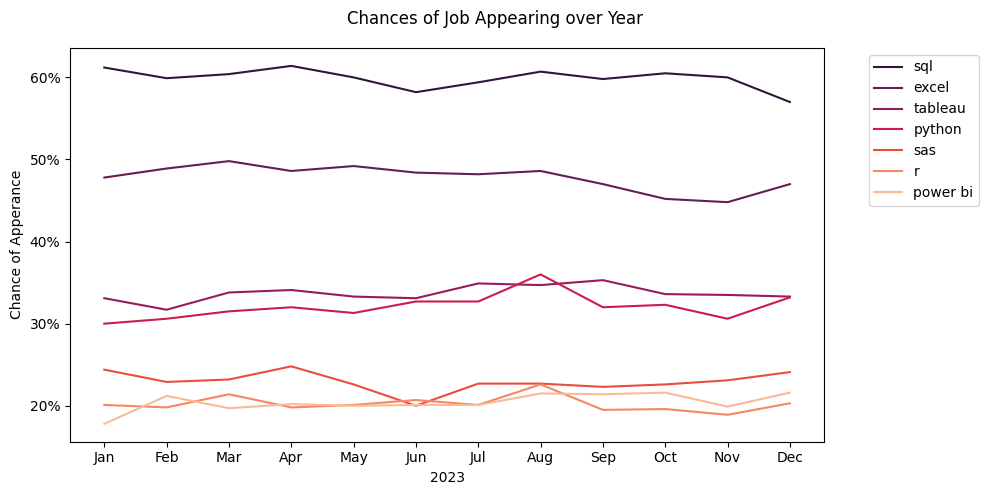

In [341]:
#plotting percent dataframe
fig, ax = plt.subplots(1)
sns.lineplot(
    data = df_monthly_percent,
    dashes = False,
    palette = "rocket",
    ax = ax
)

#formatting
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{int(y)}%"))
ax.set_xlabel("2023")
ax.set_ylabel("Chance of Apperance")
fig.suptitle("Chances of Job Appearing over Year")
fig.set_size_inches(10, 5)
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = "upper left")
plt.tight_layout()
plt.show()

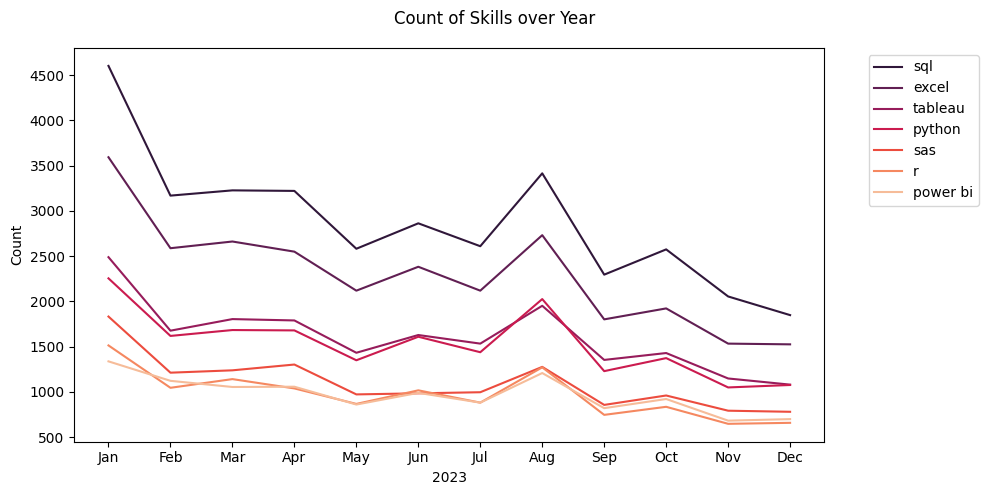

In [342]:
#plotting counts dataframe
fig, ax = plt.subplots(1)
sns.lineplot(
    data = df_monthly_counts,
    dashes = False,
    palette = "rocket",
    ax = ax
)

#formatting
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{int(y)}"))
ax.set_xlabel("2023")
ax.set_ylabel("Count")
fig.suptitle("Count of Skills over Year")
fig.set_size_inches(10, 5)
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = "upper left")
plt.tight_layout()
plt.show()